# Getting started with OSeMOSYS Python OOP

This notebook briefly shows how a simple script running an OSeMOSYS model using the abstract and concrete OSeMOSYS model classes could look like. Such a script should be placed in the `scripts` directory alongside the files defining the classes, just like this notebook.

## Requirements

The code in this notebook was tested using:
* python 3.6.6
* pyomo 5.5.0 
* glpk 4.65

For processing results and building graphs:
* pandas 0.23.4
* matplotlib 2.2.3

## Setup

First, we'll need a couple of libraries.

In [2]:
# Built-in libraries
import os
# Third-party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Second, we need to import the OSeMOSYS classes defined in the `scripts` directory.

In [3]:
# Original OSeMOSYS model formulation
from osemosys import abstract_OSeMOSYS
from osemosys import concrete_OSeMOSYS
# Model extension including a "minimize CO2 emissions" objective function
from osemosys_xtd_co2 import abstract_OSeMOSYS_CO2

## UTOPIA

UTOPIA is an illustrative example of an energy model. The data for this model are available from the OSeMOSYS repository.

### Input data from one AMPL file

This approach is very similar to using the GNU MathProg version of OSeMOSYS. All input data are packed in one single file in AMPL format. This is convenient but can become hard to maintain for bigger models. The next section shows an alternative way to input data.

First, we create an OSeMOSYS abstract model:

In [4]:
ao = abstract_OSeMOSYS()

Second, we create an OSeMOSYS concrete model from the abstract model (a given abstract model can be used to create several concrete models). We pass the following arguments to the constructor:
* *InputFile:* path (incl. file name) to the to the .dat input data file in AMPL format.
* *OutputPath:* path to a directory where all variables can be saved as csv files after solving the model.

In [5]:
# Path to input file
InputFile = os.path.join(os.pardir, 'input', 'UTOPIA', 'UTOPIA_2015_08_27.dat')
# Path where to save results
OutputPath = os.path.join(os.pardir, 'output', 'UTOPIA')
# Instantiate a concrete model
co = concrete_OSeMOSYS(ao, InputFile=InputFile, OutputPath=OutputPath)


####################################

Building a concrete model...


Third, we solve the model. By default the concrete model uses the GLPK solver, this can be changed by passing `Solver='other_solver'` to the `concrete_OSeMOSYS` constructor where 'other_solver' is the name of an alternative solver that is installed in `pyomo.opt.SolverFactory`.
<a id='solve_model'></a>

In [6]:
co.solve_model()


####################################

Solving concrete model...

Results:

Problem: 
- Name: unknown
  Lower bound: 29446.8610077433
  Upper bound: 29446.8610077433
  Number of objectives: 1
  Number of constraints: 300768
  Number of variables: 295957
  Number of nonzeros: 673997
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 11.390515089035034
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



With the Pyomo method `value` we can access results stored in single variables.

In [7]:
from pyomo.environ import value
# The value of the Pyomo Objective object should be the same as in the results displayed above
value(co.instance.OBJ)


29446.8610077433

In [8]:
# The value in ModelPeriodCostByRegion should also be the same
value(co.instance.ModelPeriodCostByRegion['UTOPIA'])

29446.8610077433

Fourth, we can export all variables with their final values to csv files.
<a id='export_all_var'></a>

In [9]:
co.export_all_var()

Finally, we can use the use the output csv files for result analysis.

In [10]:
df = pd.read_csv(os.path.join(OutputPath, 'TotalDiscountedCost.csv'))
years = df['YEAR'].values
costs = df['TotalDiscountedCost'].values
ax = plt.subplot()
plt.plot(years, costs, label='min costs')
plt.xlabel('year')
plt.xticks(years[::2])
plt.ylabel('total discounted cost [money]')
plt.title('UTOPIA')
plt.show()

### Input data from separate csv files

This approach differs from the previous one in that the data for each set and parameter of the model is imported separately from single csv files. A convenient way to maintain such input datasets is to compile them in an Excel file: each set and parameter gets a separate sheet and the sheets are exported to csv. The helper script `xls2csv.py` does just that.

First, we create an OSeMOSYS abstract model. We pass the following argument to the constructor:
* *InputPath:* path to the directory of csv input data files.

In [16]:
# Path to csv input files
InputPath = os.path.join(os.pardir, 'input', 'UTOPIA', 'csv')
# Instantiate an abstract model
ao_csv = abstract_OSeMOSYS(InputPath=InputPath)

Second, we initialze the abstract model with the input data. The output can be pretty verbose because the method warns the user that it initializes with defaults values every time a csv file is *not* found for a given set or parameter.

**Important note:** if you want to use default values for certain sets or parameters, then you *should not* provide any csv file for those (incl. not an empty file, or just with headers) otherwise pyomo will raise an error and crash.

In [17]:
ao_csv.load_data()


####################################

Initializing Sets of abstract model...

Cannot find file <../input/UTOPIA/csv/FLEXIBLEDEMANDTYPE.csv>. Using default values instead.

####################################

Initializing Params of abstract model...

Cannot find file <../input/UTOPIA/csv/DiscountRate.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/DaySplit.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/DaysInDayType.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/TradeRoute.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/DepreciationMethod.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/StorageLevelStart.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/StorageMaxChargeRate.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/StorageMaxDischargeRate.csv>. Using default values instead.

Cannot find file <

Third, we create an OSeMOSYS concrete model from the abstract model. We pass the following argument to the constructor:
* *OutputPath*: path to a directory where all variables can be saved as csv files after solving the model.


In [18]:
co_csv = concrete_OSeMOSYS(ao_csv, OutputPath=OutputPath)


####################################

Building a concrete model...


Then we can [solve the concrete model](#solve_model) and [export all variables](#export_all_var) with their final values to csv files, using the same commands as in the previous section.

In [19]:
co_csv.solve_model()


####################################

Solving concrete model...

Results:

Problem: 
- Name: unknown
  Lower bound: 29446.8610077433
  Upper bound: 29446.8610077433
  Number of objectives: 1
  Number of constraints: 300768
  Number of variables: 295957
  Number of nonzeros: 673997
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 13.508039951324463
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



## Model extension

Adding functionality to the original OSeMOSYS code without "breaking anything" can feel like a daunting task. Sub-classing the original OSeMOSYS abstract model class is a "safe" way to proceed and is shown below on a simple example.

The following code extends the original OSeMOSYS code with a new objective function minimizing total CO<sub>2</sub> emissions. See the file `osemosys_xtd_co2.py` in the `scripts`directory.

```python
from pyomo.environ import Objective, minimize
from osemosys import abstract_OSeMOSYS

class abstract_OSeMOSYS_CO2(abstract_OSeMOSYS):
    
    def __init__(self, InputPath=None):
        
        super().__init__(InputPath=InputPath)
        
        # Objective function
        self.model.OBJ_co2 = Objective(rule=self.ObjectiveFunctionCO2_rule, sense=minimize, doc='min_CO2')
                
    def ObjectiveFunctionCO2_rule(self, model):
    	return sum(self.model.ModelPeriodEmissions[r, 'CO2'] for r in self.model.REGION)
```

We have already imported this new class at the top of this notebook. To use it with the UTOPIA csv data files, just create an abstract model and initialize it:

In [20]:
ao_co2 = abstract_OSeMOSYS_CO2(InputPath=InputPath)
ao_co2.load_data()


####################################

Initializing Sets of abstract model...

Cannot find file <../input/UTOPIA/csv/FLEXIBLEDEMANDTYPE.csv>. Using default values instead.

####################################

Initializing Params of abstract model...

Cannot find file <../input/UTOPIA/csv/DiscountRate.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/DaySplit.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/DaysInDayType.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/TradeRoute.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/DepreciationMethod.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/StorageLevelStart.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/StorageMaxChargeRate.csv>. Using default values instead.

Cannot find file <../input/UTOPIA/csv/StorageMaxDischargeRate.csv>. Using default values instead.

Cannot find file <

We now have an abstract model with *two* objective functions. We need to indicate which one to use to be able to solve the model. Here we decide to minimize CO<sub>2</sub> instead of costs as in the original code:

In [21]:
# Deactivate cost minimization
ao_co2.model.OBJ.deactivate()
# Activate CO2 minimization
ao_co2.model.OBJ_co2.activate() 

We then create a concrete model. Note that we pass an *OutputCode* argument to the constructor. This is a short string that will be appended at the beginning of the csv file names when exporting variables. This allows us to save the variables in the same directory as for the original UTOPIA run without overwriting the earlier results.

In [22]:
co_co2 = concrete_OSeMOSYS(ao_co2, OutputPath=OutputPath, OutputCode='min_co2')


####################################

Building a concrete model...


Since we will be minimizing CO<sub>2</sub> emissions, we can deactivate the constraints on annual and total CO<sub>2</sub> emissions:

In [23]:
co_co2.instance.E8_AnnualEmissionsLimit.deactivate()
co_co2.instance.E9_ModelPeriodEmissionsLimit.deactivate()

We can then solve the model and export the results to csv:
<a id='min_co2'></a>

In [24]:
co_co2.solve_model()
co_co2.export_all_var()


####################################

min_co2

Solving concrete model...

Results:

Problem: 
- Name: unknown
  Lower bound: 3.1109243587495e-16
  Upper bound: 3.1109243587495e-16
  Number of objectives: 1
  Number of constraints: 300724
  Number of variables: 295957
  Number of nonzeros: 673953
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 8.850313901901245
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



We can compare the results with the original run minimizing total discounted costs:

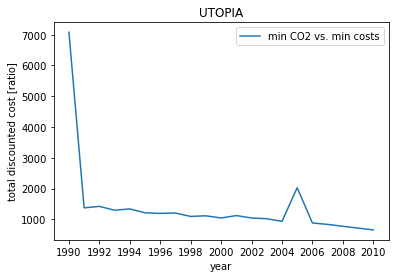

In [25]:
df_co2 = pd.read_csv(os.path.join(OutputPath, 'min_co2_TotalDiscountedCost.csv'))
costs_co2 = df['TotalDiscountedCost'].values
ratio = np.divide(costs_co2, costs) 
ax = plt.subplot()
plt.plot(years, costs, label='min CO2 vs. min costs')
plt.xlabel('year')
plt.xticks(years[::2])
plt.ylabel('total discounted cost [ratio]')
plt.title('UTOPIA')
plt.legend()
plt.show()

Same thing with the CO<sub>2</sub> emissions:

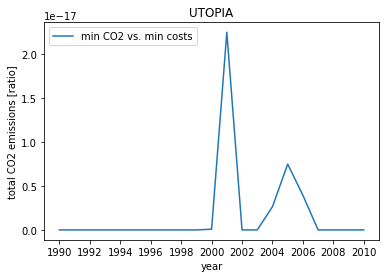

In [26]:
df1 = pd.read_csv(os.path.join(OutputPath, 'AnnualEmissions.csv'))
df2 = pd.read_csv(os.path.join(OutputPath, 'min_co2_AnnualEmissions.csv'))
em_min_costs = df1.loc[df1['EMISSION']=='CO2','AnnualEmissions'].values
em_min_co2 = df2.loc[df2['EMISSION']=='CO2','AnnualEmissions'].values
ratio = np.divide(em_min_co2, em_min_costs) 
ax = plt.subplot()
plt.plot(years, ratio, label='min CO2 vs. min costs')
plt.xlabel('year')
plt.xticks(years[::2])
plt.ylabel('total CO2 emissions [ratio]')
plt.title('UTOPIA')
plt.legend()
plt.show()

With the OSeMOSYS model runs [minimizing costs](#solve_model) and [mimimizing CO2](#min_co2) we actually have two extreme points on a Pareto curve.

In [27]:
pd.DataFrame({'cost':[value(co.instance.OBJ), value(co_co2.instance.ModelPeriodCostByRegion['UTOPIA'])], 
              'CO2':[value(co.instance.ModelPeriodEmissions['UTOPIA','CO2']), value(co_co2.instance.OBJ_co2)]}, 
    columns=['cost','CO2'], 
    index=['min cost','min CO2'])

cost           CO2
min cost  2.944686e+04  1.635168e+02
min CO2   2.920965e+07  3.110924e-16

To get more points to plot the curve, we would for instance run the model in "cost minimization mode" with different values for `ModelPeriodEmissionLimit`. This parameter value can indeed be modified directly in the concrete model instance because we used the Pyomo Parameter object attribute `mutable=True` in the definition of the class `abstract_OSeMOSYS`.

In [28]:
# Current CO2 emission limit
value(co.instance.ModelPeriodEmissionLimit['UTOPIA','CO2'])

99999

In [29]:
# Reset the limit halfway between the maximum and minimum observed values
new_limit = (value(co_co2.instance.OBJ_co2)+value(co.instance.ModelPeriodEmissions['UTOPIA','CO2']))/2
co.instance.ModelPeriodEmissionLimit['UTOPIA','CO2'] = new_limit
value(co.instance.ModelPeriodEmissionLimit['UTOPIA','CO2'])

81.758388470911

The cost optimisation can then be run again, yielding another point on the Pareto curve. Rince and repeat (a short script would do the job, of course).